# 3 决策树的应用——电话营销决策


数据集信息:  
该数据与葡萄牙银行机构的直接营销活动有关。营销活动是基于电话。通常，需要多个与同一客户的联系，以了解产品(银行定期存款)是否已认购(“yes”)或未认购(“no”)。
数据集位置："数据/bank-marketing.csv"   

数据包含有41188条数据样本，20个变量大致分为三组：

银行客户信息：年龄、职业、婚姻状况、教育程度、违约、余额、房贷、个人贷
本次营销最后一次通话记录：联系方式、日期（日）、月份、通话时长
其他特征：活动次数、联系间隔时常、之前联系次数、之前营销结果
预测值：是否购买定存（y）

数据来源：https://archive.ics.uci.edu/ml/datasets/Bank+Marketing  

本节例子基于某银行的营销活动数据，目标是建立模型预测客户是否会响应电话营销，订阅该银行的定期存款产品，包含3,000个样本，每个样本包含21个属性，如下表所示

属性  | 定义 
------|------
age | 年龄  
job  | 职业      
marital  | 婚姻状况      
education  | 学历      
default  | 是否有过违约      
housing  | 是否有房贷  
loan  | 是否有现金贷  
contact  | 电话类型（手机或固定电话）  
month  | 上次联络月份  
day_of_week  | 上次联络是一星期中的那一天  
duration  | 上次联络通话时长（以秒计算）  
campaign  | 本次营销活动联络次数  
pdays  | 以前营销活动联络距离现在的时间（以天计算）  
previous  | 以前营销活动联络次数  
poutcome  | 以前营销活动响应情况  
emp.var.rate  | 就业变化率  
cons.price.idx | 消费者价格指数  
cons.conf.idx | 消费者信心指数  
euribor3m | 欧元银行同业拆借利率  
nr.employed | 员工数  
y  | 是否转化  

数据集：[电话营销数据集](datasets/电话营销数据集.csv)

## 1. 读取数据

In [1]:
import pandas as pd
df = pd.read_csv("datasets/电话营销数据集.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 类别变量编码
**类别变量（categorical variable）**：只有有限个值得变量，如性别就是一个类别变量，如男或女。或者如本数据集里‘job’这一列，其包含多个字符，无法直接输入到模型中进行数值计算，所以我们将其转换成**数值型变量**。

In [4]:
df["job"]

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41188, dtype: object

### 序数编码
一种最简单的方式是进行序数编码（整数编码），就是将其各个类别对应不同的整数。

In [5]:
def encode_function(array):
    encode_result = {}
    integer = 1
    for i in array:
        if i not in encode_result:
            encode_result[i] = integer
            integer += 1
        else:
            continue
    return encode_result

In [6]:
encode_function(df["job"])

{'housemaid': 1,
 'services': 2,
 'admin.': 3,
 'blue-collar': 4,
 'technician': 5,
 'retired': 6,
 'management': 7,
 'unemployed': 8,
 'self-employed': 9,
 'unknown': 10,
 'entrepreneur': 11,
 'student': 12}

In [7]:
df = df.copy()
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
          'contact', 'month', 'day_of_week',  'poutcome', 'y']:
    df[i] = df[i].map(encode_function(df[i]))

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,1,1,1,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
1,57,2,1,2,2,1,1,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
2,37,2,1,2,1,2,1,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
3,40,3,1,3,1,1,1,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
4,56,2,1,2,1,1,2,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1


## 2 标准化处理
观察上面的箱形图，你会发现各个变量的取值范围差异较大，有没有什么办法将变量的取值范围统一呢？常用的标准化处理方法有最小最大值标准化处理、均值标准差标准化处理、小数标度标准化处理等。下面我们采用均值标准差标准化处理：

In [9]:
from sklearn.model_selection import train_test_split
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
y = df['y']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [12]:
X = (X - X.mean())/X.std()

<Axes: >

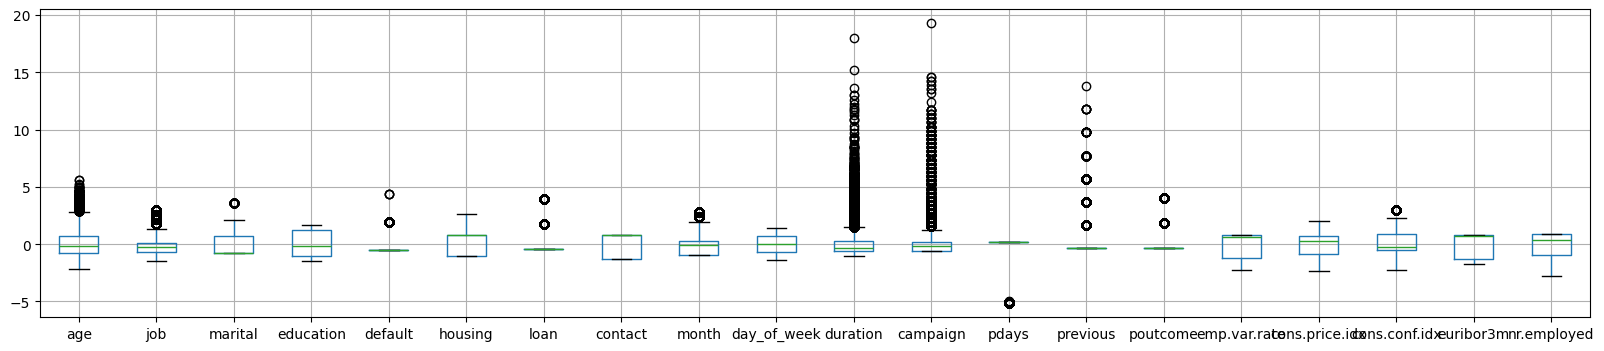

In [13]:
X.boxplot(figsize=(20,4))

## 3. 决策树模型

### 样本内训练

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(train_X,train_y)

In [15]:
train_predicted_y = clf.predict(train_X)

In [16]:
print('样本内的精度：%.2f' %clf.score(train_X, train_y))

样本内的精度：0.91


In [17]:
from sklearn import metrics
precision = metrics.precision_score(train_y, train_predicted_y)
recall = metrics.recall_score(train_y, train_predicted_y)
f1_score = metrics.f1_score(train_y,train_predicted_y)
print('样本内的查准率:%.2f' %precision)
print('样本内的查全率:%.2f' %recall)
print('样本内的f1值:%.2f' %f1_score)

样本内的查准率:0.95
样本内的查全率:0.95
样本内的f1值:0.95


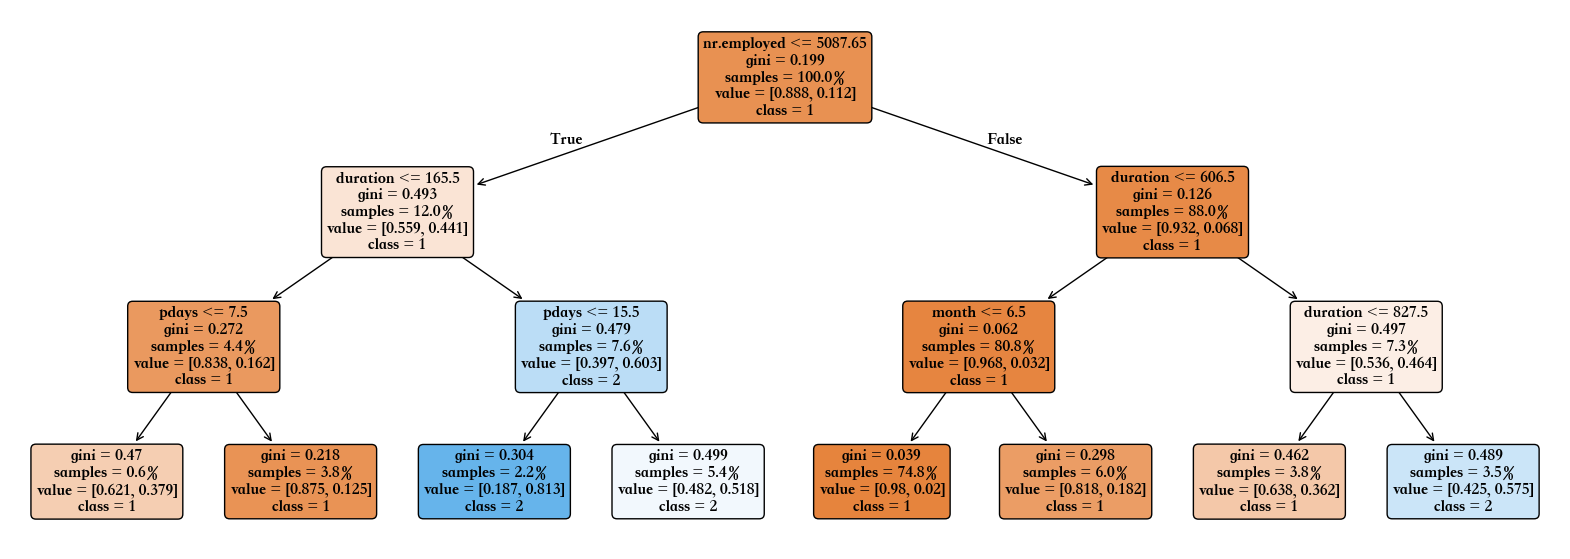

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常

from sklearn.tree import plot_tree
plt.figure(figsize = (20,7))
plot_tree(clf,
          max_depth=4,
          feature_names=X.columns.values,
          class_names=clf.classes_.astype(str),
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=12)
plt.title("", fontsize=12)
plt.show()

### 样本外检验

In [20]:
test_predicted_y = clf.predict(test_X)

In [21]:
clf.score(test_X, test_y)

0.9083515416363195

In [22]:
print('样本外的精度：%.2f' %clf.score(test_X, test_y))

样本外的精度：0.91


In [23]:
from sklearn import metrics
precision = metrics.precision_score(test_y, test_predicted_y)
recall = metrics.recall_score(test_y, test_predicted_y)
f1_score = metrics.f1_score(test_y, test_predicted_y)
print('样本外的查准率:%.2f' %precision)
print('样本外的查全率:%.2f' %recall)
print('样本外的f1值:%.2f' %f1_score)

样本外的查准率:0.95
样本外的查全率:0.95
样本外的f1值:0.95


对比样本内和样本外的各个指标，模型表现优秀。